In [551]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.special import factorial
from tqdm import tqdm

## Q1 A

Usually in linear regression problems the data is distributed around the ground truth with some standard deviation where the ground truth value depends upon x and weights, thus we need to estimate the central value around which the data is distributed that is the mean / expectation of Y|X   
For better understanding checkout the below image where black line is ground truth with red points along it, around each point there is data distributed in blue points following the pdf curve (blue curve), since we want to estimate the ground truth (i.e. the black line equation) so we should be estimating the red points which turn out to be the mean of that distribution (blue curve) hence our goal becomes to estimate E(Y|X).

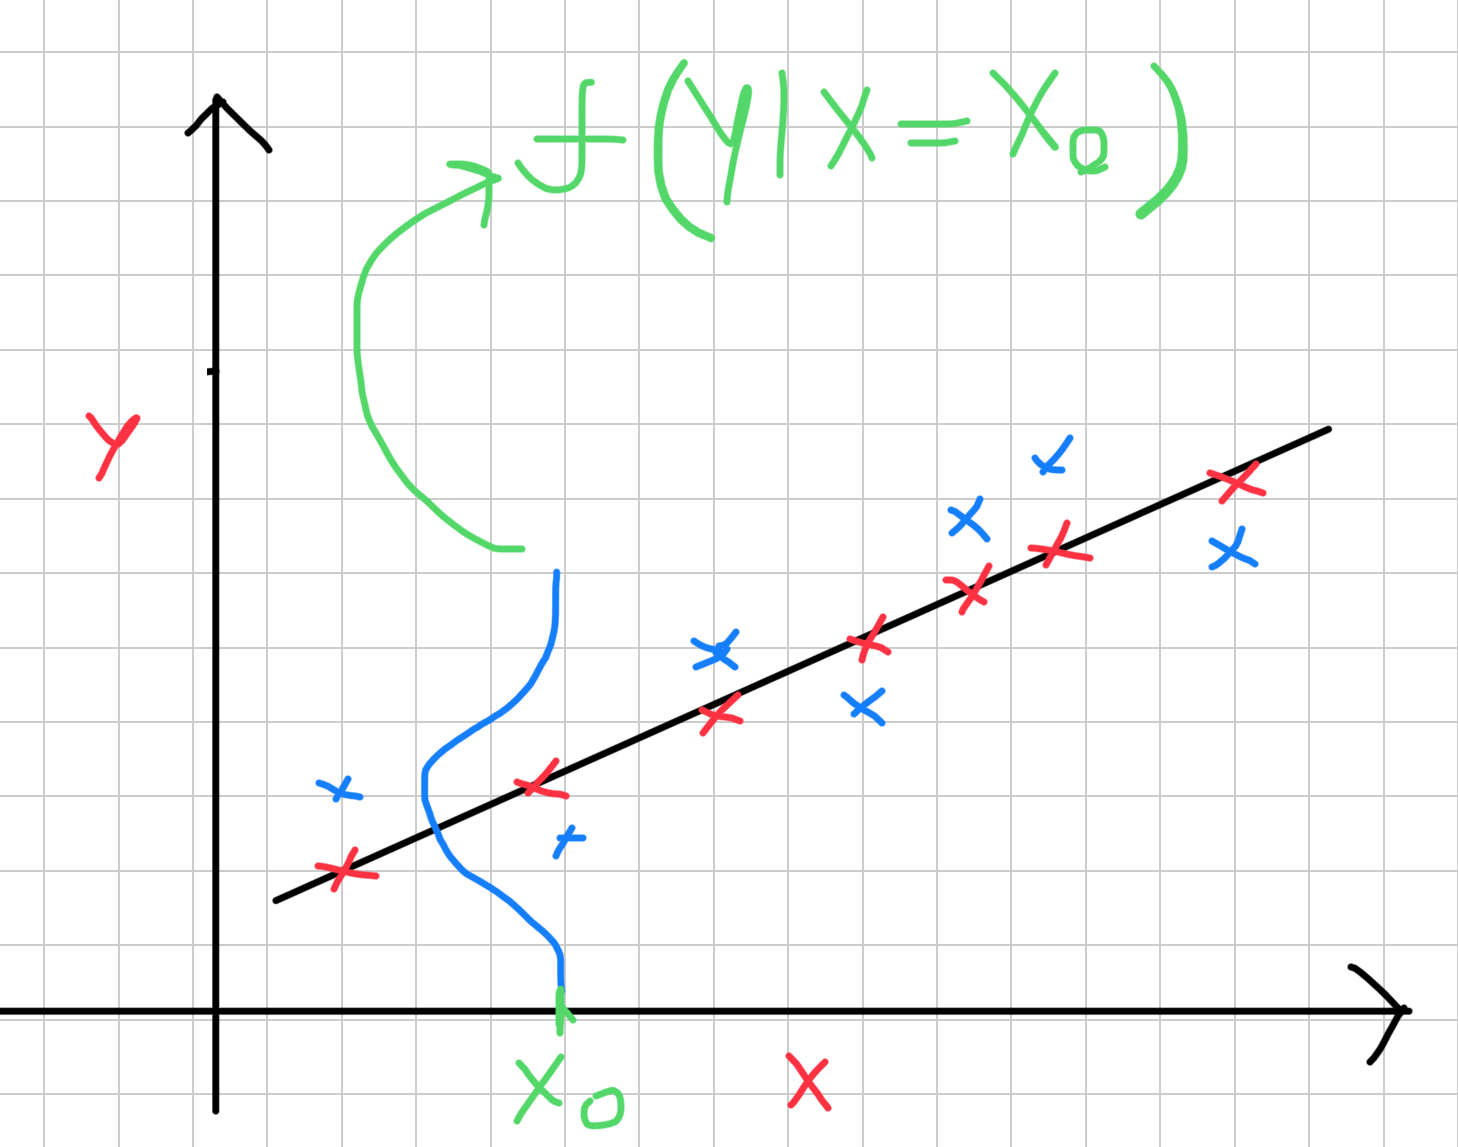

## Q1 B

We will be using closed form solution of linear regression derived using MLE 

In [591]:
class LinearRegression():
    def __init__(self):
        pass
    def fit(self, X, Y):
        self.w = (np.linalg.inverse(X.dot(X.T)).dot(X)).dot(Y.T)
    def predict(self, x):
        return self.w @ x

If $\sigma$ remains constant with any value then the final objective won't change.  
Parameterizing $\sigma$ is only helpfull when the variance is varying with value of x or else it is of no use. 

## Q1 C (Considering Poisson Distribution of exponential distribution family)

The PMF of exponential distribution is given by 
$$
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}
$$

In our case $\lambda = \exp{(w * x)}$ 
$$
P(y_i | \lambda_i) = \frac{e^{-\lambda_i} \lambda_i^{y_i}}{y_i!}
$$
Due to link function :
$$
p(y|x) = \exp{(w * x)}
$$
And Log Likelihood of the distribution will be 
$$
\log L = \sum_{i=1}^n \left(y_i * w * x_i - \exp{(w * x_i)} - \log(y_i!)\right)
$$
Then the loss function will be negative log likelihood
$$
\mathcal{L} = \sum_{i=1}^n \left(-y_i * w * x_i + \exp{(w * x_i)} + \log(y_i!)\right)
$$

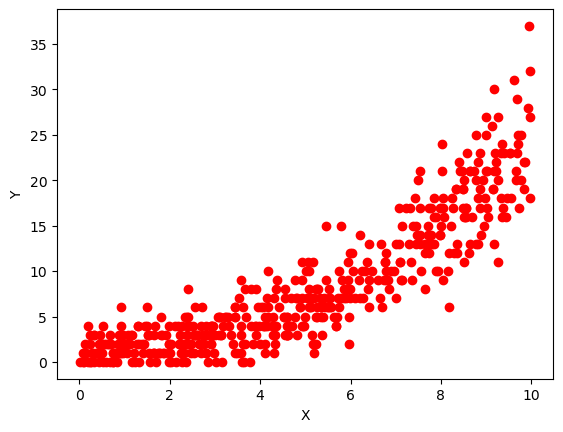

In [561]:
#Generating and visualizing dataset
W = np.array([[0.3, 0.3]])
X = np.concatenate([np.random.uniform(0, 10, size= (500, 1)), np.ones((500, 1))], 1) #Uniform points between 0 - 10

Y = np.random.poisson(np.exp(X @ W.T)) #Randomly sampled points

plt.scatter(X[:,0], Y, color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

100%|████████████████████████████████████████████████████| 100/100 [00:00<00:00, 425.38it/s]


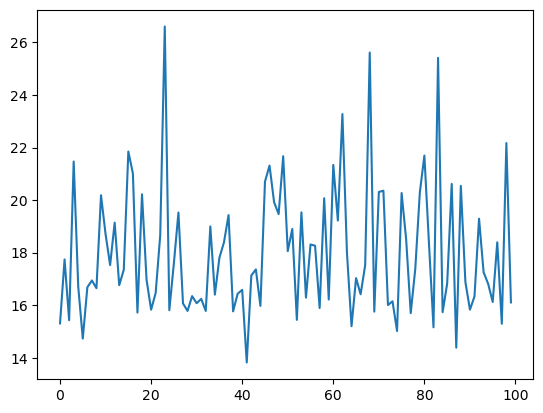

In [585]:
def sample_batch(X, Y, batch_size):
    idx = np.random.randint(0, len(X), (batch_size, ))
    x = X[idx]
    y = Y[idx]
    return x, y

num_epochs = 100
lr = 0.0001 #Learning Rate
w = np.zeros((1, 2)) #Initial Guess
batch_size = 8
loss_lis = []
for i in tqdm(range(num_epochs)):
    total_loss = 0
    for j in range(len(X) // batch_size):
        x, y = sample_batch(X, Y, batch_size)
        y = y.reshape(-1)
        y_pred = np.exp(x @ w.T) 
        loss =  -y.dot(np.log(y_pred)) + sum(y_pred) + sum(np.log(factorial(y))) #poisson loss function 
        total_loss += loss
        y = y.reshape(batch_size, 1)
        grads =  x.T @ (y_pred - y) # Gradients dL/dw
        grads = grads.reshape(1, 2)
        w -= lr * grads #Otimization step
    loss_lis.append(loss)
plt.plot(loss_lis)
#The loss is not normalized

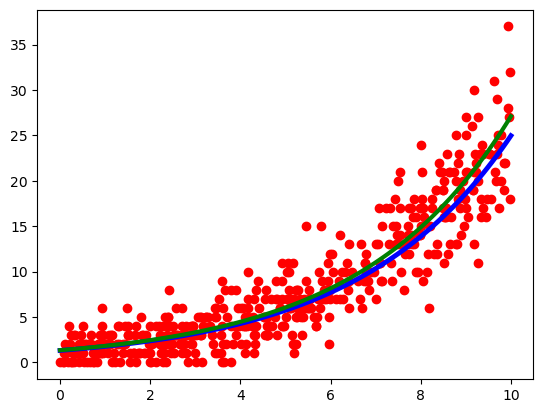

In [588]:
#Plotting Predictions
x_test = np.concatenate((np.linspace(0, 10, 100).reshape(-1, 1), np.ones((100, 1))), 1)
y_pred = np.exp(x_test @ w.T)
y_actual = np.exp(x_test @ W.T)
plt.scatter(X[:, 0], Y, color = 'red')
plt.plot(x_test[:, 0], y_pred, color = 'blue', linewidth = 3.5)
plt.plot(x_test[:, 0], y_actual, color = 'green', linewidth = 3)
#Red are training data points
#Blue line is predicted
#Green line is actual mean

# Q3

In [248]:
import numpy as np
import matplotlib.pyplot as plt

In [249]:
X = np.concatenate((np.random.uniform(1, 10, (500, 1)), np.random.uniform(1, 10, (500, 1)) , np.ones((500,1))), 1) # x1, x2, 1 (so that there is 
                                                                    # no need to add bias separately)

In [250]:
W = np.array([[0.6, -0.6, 0.5]]) # w1, w2, bias (Actual Weights)

In [251]:
Y = np.array([np.random.binomial(1, 1 / (1 + np.exp(-x @ W.T)))[0] for x in X]) # Ground Truth

In [252]:
# reds => Y = 1
# blues =>  Y = 0
reds = np.array(X[Y==1])
blues = np.array(X[Y==0])

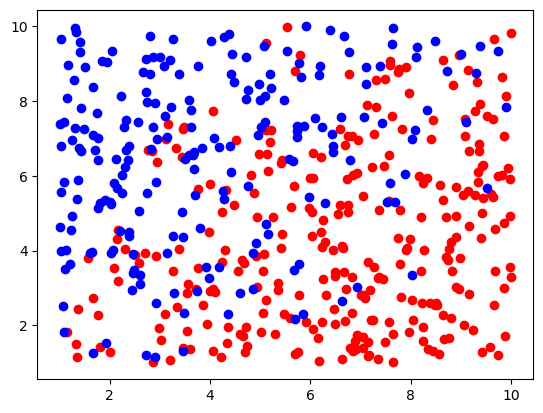

In [253]:
#Train Dataset
plt.scatter(reds[:, 0], reds[:, 1], color = 'red') # Y = 1
plt.scatter(blues[:, 0], blues[:, 1], color = 'blue') # Y = 0

In [329]:
# Log Likelihood for bernoulli distribution : Σ log( sig(X @ w(T)) ) * Y(i) + log(1 - sig(X @ w(T)) ) * (1 - Y(i))
# Loss function will be negative of log likelihood
# w are predicted weights

In [330]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Batch Gradient Descent

Time taken for 15 epochs : 0.009 s
Predicted params (W1, W2, Bias) :  (0.5904401523668777, -0.4685363912935351, -0.0072140807397043216)


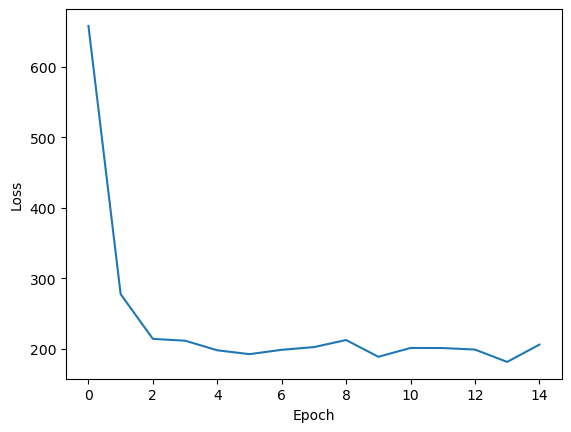

In [361]:
def sample_batch(X, batch_size):
    idx = np.random.randint(0, len(X), batch_size)
    sample_X = X[idx]
    sample_Y = Y[idx]
    return sample_X, sample_Y
    

lr = 0.001 #Learning Rate
w_init = np.random.rand(1, 3) #Initial prediction 
w = w_init
num_epochs = 15
loss_lis = []
batch_size = 64
start = time.time()
for epoch in range(num_epochs):
    net_loss = 0
    for i in range(len(X) // batch_size):
        x, y = sample_batch(X, batch_size) #Sample Batch from dataset
        
        probs = sigmoid(np.dot(x, w.T)).reshape(-1)  # Apply sigmoid function to get probabilities
        
        loss = -(np.log(probs).dot(y) + np.log(1 - probs).dot(1 - y))  # Calculate loss
        
        grads = x.T.dot(probs - y)  # Calculate gradient
        
        w -= lr * grads  # Update weights
        
        net_loss += loss
    loss_lis.append(net_loss)
print(f"Time taken for {num_epochs} epochs :", round(time.time() - start, 3), 's')
plt.plot(loss_lis)
plt.xlabel("Epoch")
plt.ylabel("Loss")
print("Predicted params (W1, W2, Bias) : ", (w[0][0], w[0][1], w[0][2]))

### Fisher scoring (Newton’s method)

Time taken for 3000 epochs : 0.157 s
Predicted params (W1, W2, Bias) :  (0.5419531901220592, -0.49088511105320853, 0.2822355886580812)


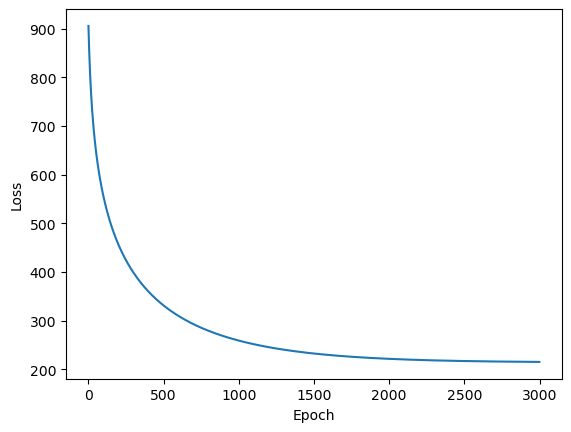

In [358]:
w = np.random.rand(1, 3)
num_epochs = 3000
loss_lis = []
start = time.time()
for epoch in range(num_epochs):
    
    probs = sigmoid(np.dot(X, w.T)).reshape(-1)  # Apply sigmoid function to get probabilities
    
    loss = -(np.log(probs).dot(Y) + np.log(1 - probs).dot(1 - Y))  # Calculate loss

    grads = X.T.dot(probs - Y)  # Calculate gradient
    
    hessian = (X.T * probs * (1 - probs)).dot(X) #Calculate Hessian
    
    w -= lr * np.linalg.inv(hessian).dot(grads)  # Update weights
    
    loss_lis.append(loss)
print(f"Time taken for {num_epochs} epochs :", round(time.time() - start, 3), 's')
print("Predicted params (W1, W2, Bias) : ", (w[0][0], w[0][1], w[0][2]))
plt.plot(loss_lis)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

As we can see Batch Gradient Descent converges in just few epochs while Fisher scoring takes thousands of epochs to converge  also for apples to apples comparison if we consider the complete dataset as a single batch in gradient descent (because adding batches slows it down) it turns out to be almost 2x faster than Fisher scoring method while achieving convergence wayy before. 

## Q2

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

In [275]:
train_A = pd.read_csv('train_set_A.csv')
test_A = pd.read_csv('test_set_A.csv')
train_B = pd.read_csv('train_set_B.csv')
test_B = pd.read_csv('test_set_B.csv')
train_C = pd.read_csv('train_set_C.csv')
test_C = pd.read_csv('test_set_C.csv')

In [276]:
#Set A
model_A = LinearRegression()
y_A = np.array(train_A['y']).reshape(-1, 1)
x_A = np.array(train_A['x']).reshape(-1, 1)
model_A.fit(x_A, y_A)
preds_A = model_A.predict(np.array(test_A['x']).reshape(-1, 1))
print("Set A")
print("Test MSE : ", mean_squared_error(preds_A, np.array(test_A['y']).reshape(-1, 1)))

Set A
Test MSE :  22.25770734371434


In [277]:
#Set B
model_B = LinearRegression()
y_B = np.array(train_B['y']).reshape(-1, 1)
x_B = np.array(train_B['x']).reshape(-1, 1)
model_B.fit(x_B, y_B)
preds_B = model_B.predict(np.array(test_B['x']).reshape(-1, 1))
print("Set B")
print("Test MSE : ", mean_squared_error(preds_B, np.array(test_B['y']).reshape(-1, 1)))

Set B
Test MSE :  1.9577195262268569e-25


In [278]:
#Set C
model_C = LinearRegression()
y_C = np.array(train_C['y']).reshape(-1, 1)
x_C = np.array(train_C['x']).reshape(-1, 1)
model_C.fit(x_C, y_C)
preds_C = model_C.predict(np.array(test_C['x']).reshape(-1, 1))
print("Set C")
print("Test MSE : ", mean_squared_error(preds_C, np.array(test_C['y']).reshape(-1, 1)))

Set C
Test MSE :  5.699794881410673


## Distribution of 3 Datasets

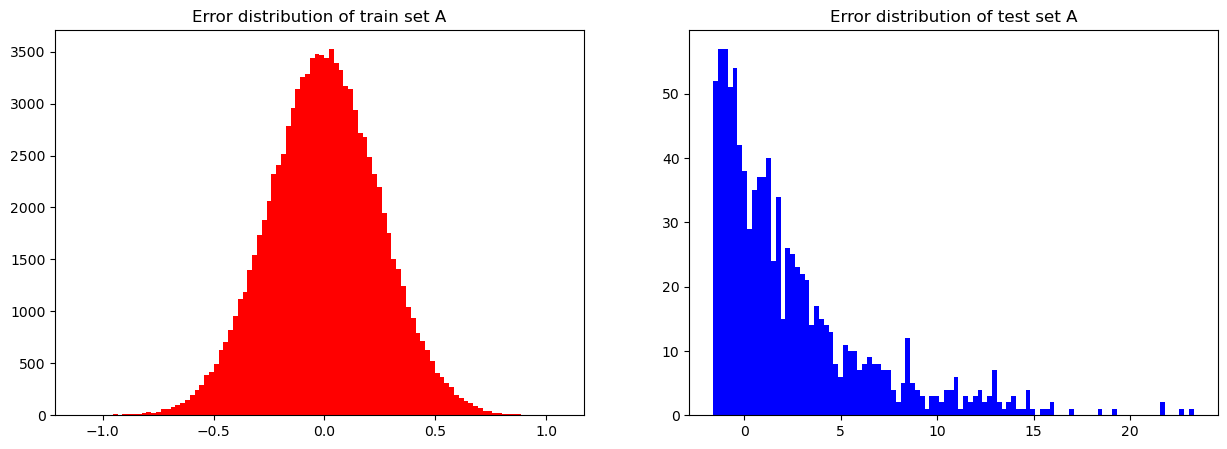

Train Mean :  -1.1694716306465126e-13
Train var :  0.06215692531922187
Test var :  16.147303073527276


In [279]:
#Set A
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].hist((y_A - model_A.predict(x_A)), bins = 100, color = 'red') 
ax[0].set_title("Error distribution of train set A")
ax[1].hist((np.array(test_A['y']).reshape(-1, 1) - preds_A), bins = 100, color = 'blue')
ax[1].set_title("Error distribution of test set A")
plt.show()
#As we can see the train set is normally distributed while test set is exponentially distributed
mu = (y_A - model_A.predict(x_A)).mean() # ≈ 0
print("Train Mean : " ,mu)
var = (y_A - model_A.predict(x_A)).var() # ≈ 0.062
print("Train var : ", var)
#Train ~ N(0, 0.06)

#Test set follows exponential distribution with some bias added 
test_var = (np.array(test_A['y']).reshape(-1, 1) - preds_A).var()
print("Test var : ", test_var)
#since test_var = 1 / λ^2 
# We  can say Test ~ Exponential(0.25) with some bias

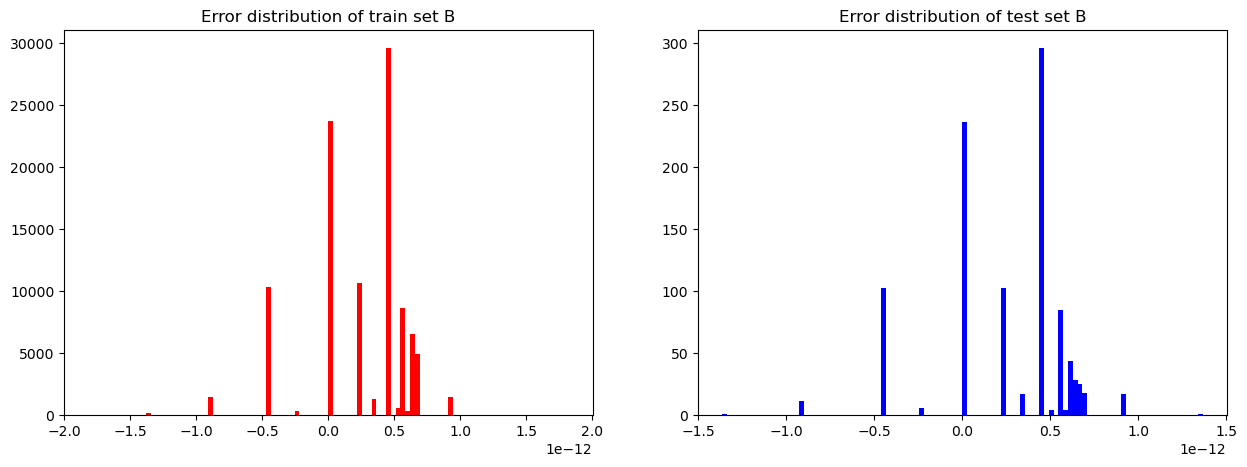

In [280]:
#Set B
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].hist((y_B - model_B.predict(x_B)), bins = 100, color = 'red') 
ax[0].set_title("Error distribution of train set B")
ax[1].hist((np.array(test_B['y']).reshape(-1, 1) - preds_B), bins = 100, color = 'blue')
ax[1].set_title("Error distribution of test set B")
plt.show()
#Both the distributions look almost same

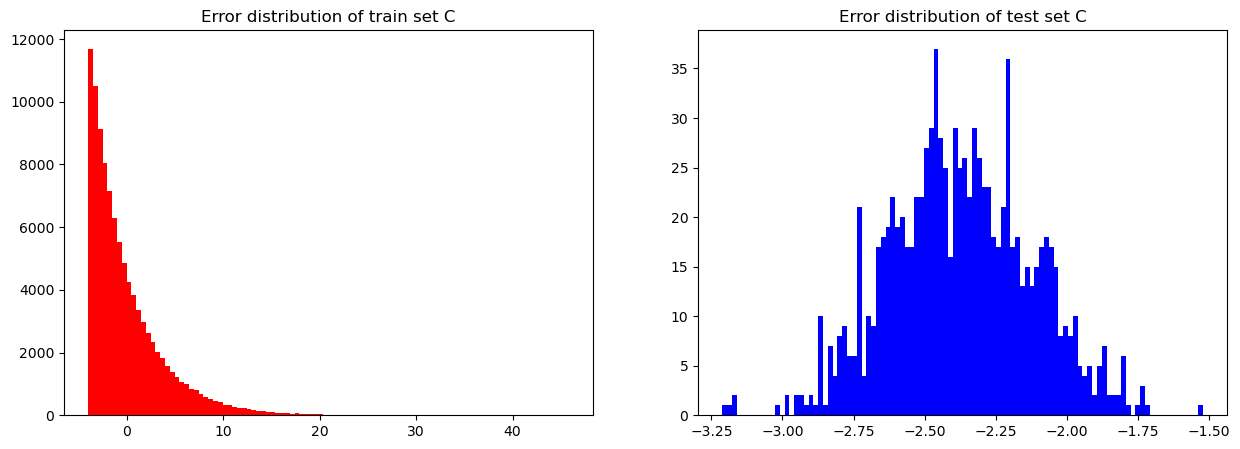

Train var :  15.791529244378367
Test Mean :  -2.374281984877448
Test var :  0.06257993769707847


In [282]:
#Set C
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].hist((y_C - model_C.predict(x_C)), bins = 100, color = 'red') 
ax[0].set_title("Error distribution of train set C")
ax[1].hist((np.array(test_C['y']).reshape(-1, 1) - preds_C), bins = 100, color = 'blue')
ax[1].set_title("Error distribution of test set C")
plt.show()
#As we can see the train set is exponentialy distributed and test set is normally distributed

var_train = (y_C - model_C.predict(x_C)).var() 
print("Train var : " ,var_train)
mu_test = (np.array(test_C['y']).reshape(-1, 1) - preds_C).mean()
print("Test Mean : ", mu_test)
var_test = (np.array(test_C['y']).reshape(-1, 1) - preds_C).var()
print("Test var : ", var_test)

#since train_var = 1 / λ^2 
#we can say train ~ Exponential(0.25)
#And test ~ Normal(-2.3, 0.06)

###### Conclusion : Since train and test distribution of set B almost match each other and set B giving least loss on test set we can say B is from actual distribution


## Q4

For each of parts, indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer using concepts covered during the lecture and try to hit upon certain key-terms. Also, discuss the bias and variance tradeoff in each scenario.  
a. The sample size n is extremely large, and the number of predictors p is small.  
b. The number of predictors p is extremely large, and the number of observations n is small.  
c. The relationship between the predictors and response is highly non-linear.

### Answer  :  
a. If n is extremely large and p is small then a flexible model will give better results as there are many examlpes in training set which makes chances of overfitting less thus both bias and variance will be optimal. And it will be hard for non flexible model to fit the data due to less number of predictors resulting in more bias and less variance.   
b. If n is small and p is very large a flexible mode will just overfit the data resulting in high variance and less bias thus here a non flexible model will perform better as the number of predictors are also high having optimal bias and variance.   
c. If the relationship is non linear then a flexible model will perform better as the model will have to cpture that non linearity which will be hard for a non flexible model. Again the flexible model might have optimal bias and variance (depends upon dataset) but the non flexible model will have low variance and high bias.  